In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# Preliminaries

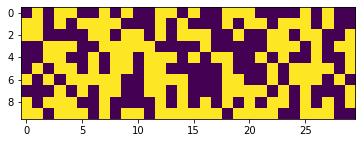

In [2]:
# this is how you plot an array of 0,1 values
a = np.random.randint(2, size=[10,30])
im = plt.imshow(a)
plt.show()

# Elementary Cellular Automata

In [3]:
n = 30  # number of cells
T = 50  # number of time steps

In [4]:
transition_table = {
    (0,0,0): 1,
    (0,0,1): 0,
    (0,1,0): 1,
    (0,1,1): 0,
    (1,0,0): 1,
    (1,0,1): 1,
    (1,1,0): 0,
    (1,1,1): 1,
}

In [5]:
def next_state(cur_state):
    next_state_ret = []
    for cix, cell_value in enumerate(cur_state):
        next_state_ret.append(transition_table[(cur_state[(cix-1)%n], cur_state[cix%n], cur_state[(cix+1)%n])])
    return next_state_ret

In [6]:
# works
np.array(next_state(np.random.randint(2, size=n)))

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1])

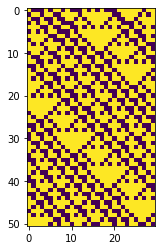

In [7]:
state_array = [np.random.randint(2, size=n)]

for t in range(T):
    state_array.append(next_state(state_array[-1]))

plt.imshow(state_array)
plt.show()

# Animating a sequence of two-dimensional arrays

*Note*: you should probably have 'ffmpeg' installed. If you do not then do e.g. 

```
sudo apt-get install ffmpeg
``` 

or follow https://www.wikihow.com/Install-FFmpeg-on-Windows for Windows.

In [8]:
L = 50
T = 50

In [9]:
def show_state_over_time(states_over_time):
    '''
    @param states_over_time: a TxLxL array for T time steps and a system size of LxL.
    '''
    assert np.ndim(states_over_time) == 3
    
    num_time_steps = np.shape(states_over_time)[0]
    
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure()
    im = plt.imshow(np.random.randint(3, size=(L,L)), animated=True)
    
    # animation function. This is called sequentially
    def animate(i):
        im.set_array(states_over_time[i])
        return im,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=num_time_steps, interval=200, blit=True)

    # save the animation as an mp4.  This requires ffmpeg or mencoder to be
    # installed.  The extra_args ensure that the x264 codec is used, so that
    # the video can be embedded in html5.  You may need to adjust this for
    # your system: for more information, see
    # http://matplotlib.sourceforge.net/api/animation_api.html
    # anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

    return HTML(anim.to_html5_video())
#     rc('animation', html='html5')
#     return anim

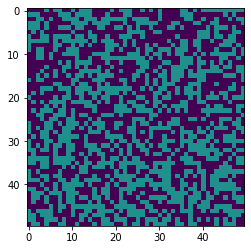

In [10]:
# here you should supply an array of LxL sized arrays, which are the time steps of the 2D CA. 
# For this example I simply supply random values.
show_state_over_time(np.random.randint(2, size=(T,L,L)))

# note: for some reason the initial imagine is also displayed, I don't know why, just ignore it. A bonus mark 
# for the one who figures out a way to get rid of it.

# Assignment

Implement a forest fire two-dimensional cellular automaton, simulate it for a sufficient number of time steps and a system size of at least $50 \times 50$, and visualize its temporal evolution for different initial settings (at least density). Let the fire (or epidemic) start from the left of the CA, so all trees in the left-most column start as on-fire. Use fixed boundary conditions. Use the simulation outputs to support your answers to the following questions:

1. What is the critical value for the density of trees (or susceptible persons) in order to have system-wide fire spreading (epidemics)? Use a deterministic forest fire model.
2. Now choose an infection probability and use it to probabilistically infect a cell, independently once per infected neighbor. What is the new critical density?
3. Now make the neighborhood radius $r=2$ instead of the current $r=1$. How does this influence the critical density?
4. Use your previous numerical results to briefly comment on the likelihood of global pandemics under the influence of growing connectivity and growing densities of people in the world. 
5. (Bonus) Add another aspect to the spreading phenomenon and show how this influences the spreading and critical density. Possible ideas:
  1. Let each person (infected or susceptible) randomly move around, 1 cell per time step. Note that this cannot be implemented perfectly in the CA formalism. Either deviate from the strict CA formalism or try to maintain conservation of people on average, using appropriate probabilities for movement versus random removal of persons.
  2. Add blocking structures where no person can stand.
  3. Add a fraction of immune persons.
  4. Add a rate of regeneration of persons and use periodic boundary conditions. Can you create a situation in which a wave of epidemics is perpetually going 'around the globe'?

Tip: for programming 2D CAs it is more practical to make `transition_table` a function instead of a table (dictionary).